In [1]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from urllib.request import urlopen

pd.set_option("display.max_columns", None)

In [19]:
year = 2024

response = urlopen(f'https://api.openf1.org/v1/meetings?year={year}')
calendar_data = json.loads(response.read().decode('utf-8'))
calendar_df = pd.DataFrame(calendar_data)
calendar_df

HTTPError: HTTP Error 429: Too Many Requests

In [18]:
print(f'https://api.openf1.org/v1/meetings?year={year}')

https://api.openf1.org/v1/meetings?year=2024


In [ ]:
country = "Belgium"

response = urlopen(f'https://api.openf1.org/v1/sessions?country_name={country}&session_name=Sprint&year={year}')

session_info = json.loads(response.read().decode('utf-8'))  # Get session_key to access details of the race.

for line in session_info[0]:
    print(line, ":", session_info[0][line])

HTTPError: HTTP Error 429: Too Many Requests

In [10]:
session_key = session_info[0]["session_key"]

response = urlopen(f'https://api.openf1.org/v1/laps?session_key={session_key}&driver_number=63')
session_data = json.loads(response.read().decode('utf-8'))
print(session_data)

IndexError: list index out of range

In [5]:
# Print session data
for line in session_data[0]:
  print(line, ":", session_data[0][line])

meeting_key : 1242
session_key : 9574
driver_number : 63
i1_speed : 331
i2_speed : 202
st_speed : 310
date_start : None
lap_duration : None
is_pit_out_lap : False
duration_sector_1 : None
duration_sector_2 : 51.125
duration_sector_3 : 29.496
segments_sector_1 : [2048, 2049, 2049, 2049, 2049, 2049, 2049, 2051]
segments_sector_2 : [2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]
segments_sector_3 : [2048, 2048, 2049, 2049, 2048, 2049, 2049]
lap_number : 1


In [6]:
response = urlopen(f'https://api.openf1.org/v1/laps?session_key={session_key}')

data = json.loads(response.read().decode('utf-8'))
print(data)

[{'meeting_key': 1242, 'session_key': 9574, 'driver_number': 1, 'i1_speed': 313, 'i2_speed': 202, 'st_speed': 300, 'date_start': None, 'lap_duration': None, 'is_pit_out_lap': False, 'duration_sector_1': None, 'duration_sector_2': 52.573, 'duration_sector_3': 29.298, 'segments_sector_1': [2048, 2049, 2049, 2049, 2049, 2049, 2051, 2049], 'segments_sector_2': [2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049], 'segments_sector_3': [2048, 2048, 2048, 2048, 2048, 2049, 2049], 'lap_number': 1}, {'meeting_key': 1242, 'session_key': 9574, 'driver_number': 2, 'i1_speed': 289, 'i2_speed': 191, 'st_speed': 268, 'date_start': None, 'lap_duration': None, 'is_pit_out_lap': False, 'duration_sector_1': None, 'duration_sector_2': 54.416, 'duration_sector_3': 30.121, 'segments_sector_1': [2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049], 'segments_sector_2': [2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049], 'segments_sector_3': [2049, 2049, 2049, 2049, 2051, 

In [7]:
df = pd.DataFrame(data)
df.head()

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,segments_sector_1,segments_sector_2,segments_sector_3,lap_number
0,1242,9574,1,313.0,202.0,300.0,None,NaN,False,NaN,52.573,29.298,"[2048, 2049, 2049, 2049, 2049, 2049, 2051, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2048, 2048, 2048, 2048, 2048, 2049, 2049]",1
1,1242,9574,2,289.0,191.0,268.0,None,NaN,False,NaN,54.416,30.121,"[2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2051, 2049, 2049]",1
2,1242,9574,3,323.0,200.0,281.0,None,NaN,False,NaN,52.773,29.871,"[2048, 2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2048, 2048, 2048, 2048, 2049, 2048]",1
3,1242,9574,4,317.0,197.0,312.0,None,NaN,False,NaN,51.462,29.456,"[2048, 2049, 2049, 2049, 2051, 2051, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2048, 2048, 2048, 2048, 2049, 2048]",1
4,1242,9574,10,327.0,197.0,284.0,None,NaN,False,NaN,52.344,29.936,"[2048, 2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2048, 2048, 2048, 2048, 2049, 2048]",1


In [8]:
drivers = {
    1:"VER",
    2:"SAR",
    3:"RIC",
    4:"NOR",
    10:"GAS",
    11:"PER",
    14:"ALO",
    16:"LEC",
    18:"STR",
    20:"MAG",
    22:"TSU",
    23:"ALB",
    24:"ZHU",
    27:"HUL",
    31:"OCO",
    44:"HAM",
    55:"SAI",
    63:"RUS",
    77:"BOT",
    81:"PIA",
}

In [9]:
teams = {
    "VER":"RBR",
    "SAR":"WIL",
    "RIC":"VCA",
    "NOR":"MCL",
    "GAS":"ALP",
    "PER":"RBR",
    "ALO":"AMR",
    "LEC":"FER",
    "STR":"AMR",
    "MAG":"HAS",
    "TSU":"VCA",
    "ALB":"WIL",
    "ZHU":"SAU",
    "HUL":"HAS",
    "OCO":"ALP",
    "HAM":"MER",
    "SAI":"FER",
    "RUS":"MER",
    "BOT":"SAU",
    "PIA":"MCL",
}

In [10]:
lap_numbers = list(df["lap_number"].unique())
print(lap_numbers)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]


In [11]:
driver_numbers = list(df["driver_number"].unique())
print(driver_numbers)

[1, 2, 3, 4, 10, 11, 14, 16, 18, 20, 22, 23, 24, 27, 31, 44, 55, 63, 77, 81]


In [12]:
df

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,segments_sector_1,segments_sector_2,segments_sector_3,lap_number
0,1242,9574,1,313.0,202.0,300.0,None,NaN,False,NaN,52.573,29.298,"[2048, 2049, 2049, 2049, 2049, 2049, 2051, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2048, 2048, 2048, 2048, 2048, 2049, 2049]",1
1,1242,9574,2,289.0,191.0,268.0,None,NaN,False,NaN,54.416,30.121,"[2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2051, 2049, 2049]",1
2,1242,9574,3,323.0,200.0,281.0,None,NaN,False,NaN,52.773,29.871,"[2048, 2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2048, 2048, 2048, 2048, 2049, 2048]",1
3,1242,9574,4,317.0,197.0,312.0,None,NaN,False,NaN,51.462,29.456,"[2048, 2049, 2049, 2049, 2051, 2051, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2048, 2048, 2048, 2048, 2049, 2048]",1
4,1242,9574,10,327.0,197.0,284.0,None,NaN,False,NaN,52.344,29.936,"[2048, 2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2048, 2048, 2048, 2048, 2049, 2048]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,1242,9574,16,NaN,NaN,314.0,2024-07-28T14:22:11.702000+00:00,NaN,False,30.976,NaN,NaN,"[None, 2048, 2049, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 0, 0, 0, 0, 0, 0, 0, 0]",[],44
825,1242,9574,44,337.0,NaN,316.0,2024-07-28T14:22:03.721000+00:00,NaN,False,30.734,NaN,NaN,"[2051, 2048, 2048, 2048, 2048, 2049, 2049, 2049]","[2048, 2048, 2049, 2048, 2048, 2048, 0, 0, 0, ...",[],44
826,1242,9574,55,325.0,NaN,315.0,2024-07-28T14:22:23.711000+00:00,NaN,False,30.944,NaN,NaN,"[None, 2048, 2049, 2048, 2048, 2048, 2048, 2048]","[2048, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",[],44
827,1242,9574,63,324.0,NaN,313.0,2024-07-28T14:22:03.136000+00:00,NaN,False,NaN,NaN,NaN,"[2068, 2048, 2048, 2048, 2048, 2048, 2048, 2048]","[2048, 2049, 2048, 2048, 2048, 2048, 0, 0, 0, ...",[],44


In [14]:
lap_times_pivot = pd.pivot(df,
    index="lap_number",
    columns="driver_number",
    values="lap_duration"
)
lap_times_pivot

driver_number,1,2,3,4,10,11,14,16,18,20,22,23,24,27,31,44,55,63,77,81
lap_number,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,109.828,112.288,111.541,110.504,111.273,110.240,111.316,110.240,111.654,111.732,112.391,111.283,112.099,111.800,111.312,109.849,110.260,110.160,111.452,110.164
3,110.141,111.366,111.215,110.131,110.757,109.983,110.204,110.519,111.394,111.314,111.051,110.200,181.122,111.234,110.518,109.109,110.113,110.012,111.085,109.971
4,110.055,110.772,110.715,110.012,110.366,109.790,110.421,109.796,110.819,111.004,110.858,110.310,112.376,110.912,110.371,109.808,109.882,110.057,110.527,109.847
5,110.138,111.115,110.314,110.155,110.528,109.896,110.690,109.494,110.495,110.787,110.956,110.723,133.633,110.769,110.636,109.376,110.237,110.185,110.462,110.085
6,110.073,111.282,110.960,110.201,111.092,110.129,110.751,109.658,110.923,111.355,111.318,111.027,NaN,111.278,110.908,109.400,110.243,110.090,111.097,109.963
7,110.146,111.662,111.290,110.072,111.149,109.637,110.778,109.798,111.234,111.277,111.179,110.906,NaN,115.520,111.095,109.357,109.977,109.912,111.179,110.030
8,110.094,115.636,115.595,110.298,111.388,109.912,110.826,109.549,111.570,111.285,111.369,115.365,NaN,124.815,111.110,109.666,110.385,110.548,111.417,110.062
9,110.609,123.886,123.019,110.298,116.010,110.286,111.232,110.096,111.335,111.189,111.690,123.191,NaN,109.634,111.305,109.704,110.296,110.142,111.409,110.481


In [11]:
lap_times_df = pd.DataFrame(index=lap_numbers, columns=driver_numbers)

for index, row in df.iterrows():
    lap_number = row["lap_number"]
    driver_number = row["driver_number"]
    lap_duration = row["lap_duration"]

    lap_times_df.loc[lap_number, driver_number] = lap_duration

In [12]:
lap_times_df = lap_times_df.astype(float)
lap_times_df.columns = lap_times_df.columns.map(drivers)
lap_times_df

,VER,SAR,RIC,NOR,GAS,PER,ALO,LEC,STR,MAG,TSU,ALB,ZHU,HUL,OCO,HAM,SAI,RUS,BOT,PIA
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,109.828,112.288,111.541,110.504,111.273,110.240,111.316,110.240,111.654,111.732,112.391,111.283,112.099,111.800,111.312,109.849,110.260,110.160,111.452,110.164
3,110.141,111.366,111.215,110.131,110.757,109.983,110.204,110.519,111.394,111.314,111.051,110.200,181.122,111.234,110.518,109.109,110.113,110.012,111.085,109.971
4,110.055,110.772,110.715,110.012,110.366,109.790,110.421,109.796,110.819,111.004,110.858,110.310,112.376,110.912,110.371,109.808,109.882,110.057,110.527,109.847
5,110.138,111.115,110.314,110.155,110.528,109.896,110.690,109.494,110.495,110.787,110.956,110.723,133.633,110.769,110.636,109.376,110.237,110.185,110.462,110.085
6,110.073,111.282,110.960,110.201,111.092,110.129,110.751,109.658,110.923,111.355,111.318,111.027,NaN,111.278,110.908,109.400,110.243,110.090,111.097,109.963
7,110.146,111.662,111.290,110.072,111.149,109.637,110.778,109.798,111.234,111.277,111.179,110.906,NaN,115.520,111.095,109.357,109.977,109.912,111.179,110.030
8,110.094,115.636,115.595,110.298,111.388,109.912,110.826,109.549,111.570,111.285,111.369,115.365,NaN,124.815,111.110,109.666,110.385,110.548,111.417,110.062
9,110.609,123.886,123.019,110.298,116.010,110.286,111.232,110.096,111.335,111.189,111.690,123.191,NaN,109.634,111.305,109.704,110.296,110.142,111.409,110.481
10,114.655,109.428,109.689,110.334,124.826,110.057,110.915,109.963,111.251,111.712,111.514,109.702,NaN,109.269,111.085,109.951,110.182,114.652,110.863,110.045


In [13]:
lap_times_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 1 to 44
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VER     42 non-null     float64
 1   SAR     42 non-null     float64
 2   RIC     42 non-null     float64
 3   NOR     42 non-null     float64
 4   GAS     41 non-null     float64
 5   PER     42 non-null     float64
 6   ALO     42 non-null     float64
 7   LEC     42 non-null     float64
 8   STR     41 non-null     float64
 9   MAG     41 non-null     float64
 10  TSU     42 non-null     float64
 11  ALB     41 non-null     float64
 12  ZHU     4 non-null      float64
 13  HUL     42 non-null     float64
 14  OCO     42 non-null     float64
 15  HAM     42 non-null     float64
 16  SAI     42 non-null     float64
 17  RUS     42 non-null     float64
 18  BOT     41 non-null     float64
 19  PIA     42 non-null     float64
dtypes: float64(20)
memory usage: 8.3 KB


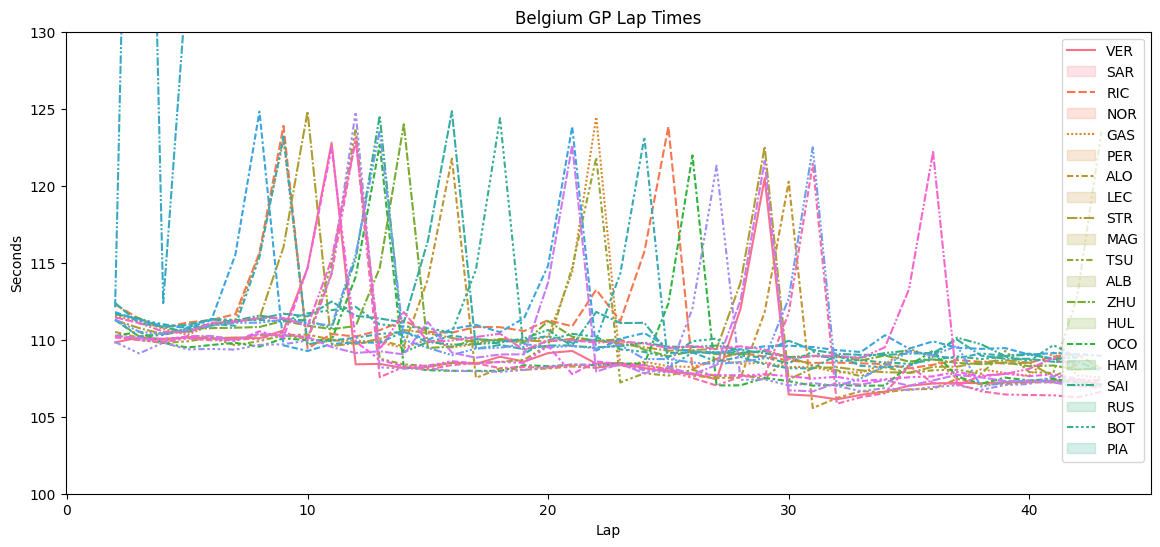

In [14]:
fig, ax = plt.subplots(figsize=(14,6))
sns.lineplot(data=lap_times_df,)
plt.title(f"{session_info[0]['country_name']} GP Lap Times")
plt.ylim(100,130)
plt.xlabel("Lap")
plt.ylabel("Seconds")
plt.legend(lap_times_df.columns)
plt.show();

In [15]:
drivers.values()

dict_values(['VER', 'SAR', 'RIC', 'NOR', 'GAS', 'PER', 'ALO', 'LEC', 'STR', 'MAG', 'TSU', 'ALB', 'ZHU', 'HUL', 'OCO', 'HAM', 'SAI', 'RUS', 'BOT', 'PIA'])

In [16]:
fig = px.line(data_frame=lap_times_df, line_shape='spline', title="Belgian GP Lap Times",
              #color_discrete_map=drivers.items(),
              labels={"value":"Lap Times", "index":"Laps"})
fig.update_layout(yaxis_range=[105,125])
fig.show()

In [17]:
george_russel_lap_times = pd.Series([data[i]["lap_duration"] for i in range(1,44)])
len(george_russel_lap_times)

43

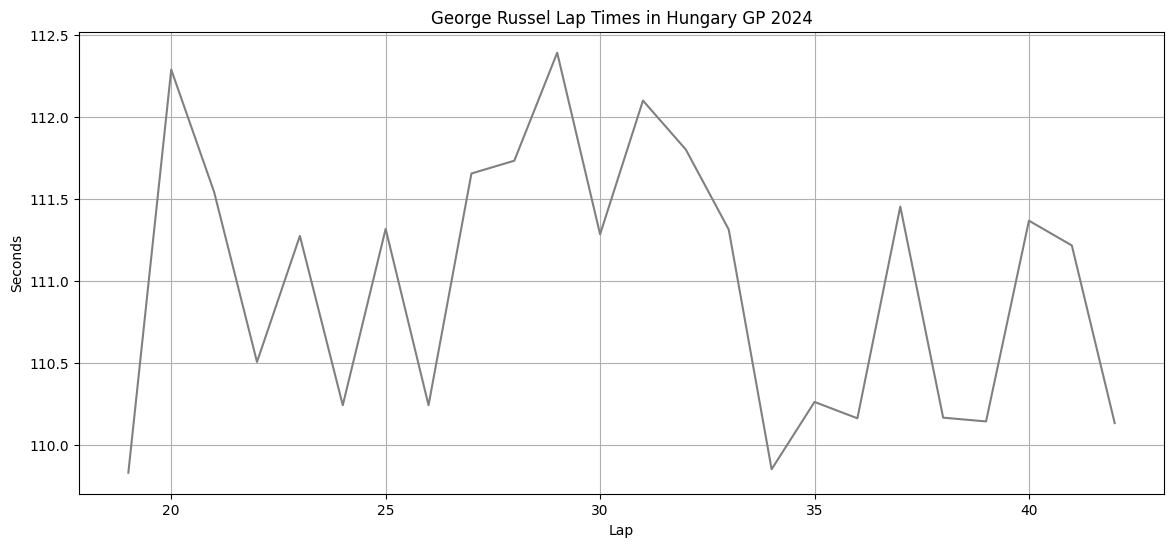

In [18]:
plt.subplots(figsize=(14,6))
sns.lineplot(data=george_russel_lap_times, color="grey")
plt.title("George Russel Lap Times in Hungary GP 2024")
plt.xlabel("Lap")
plt.ylabel("Seconds")
plt.grid()
plt.show()

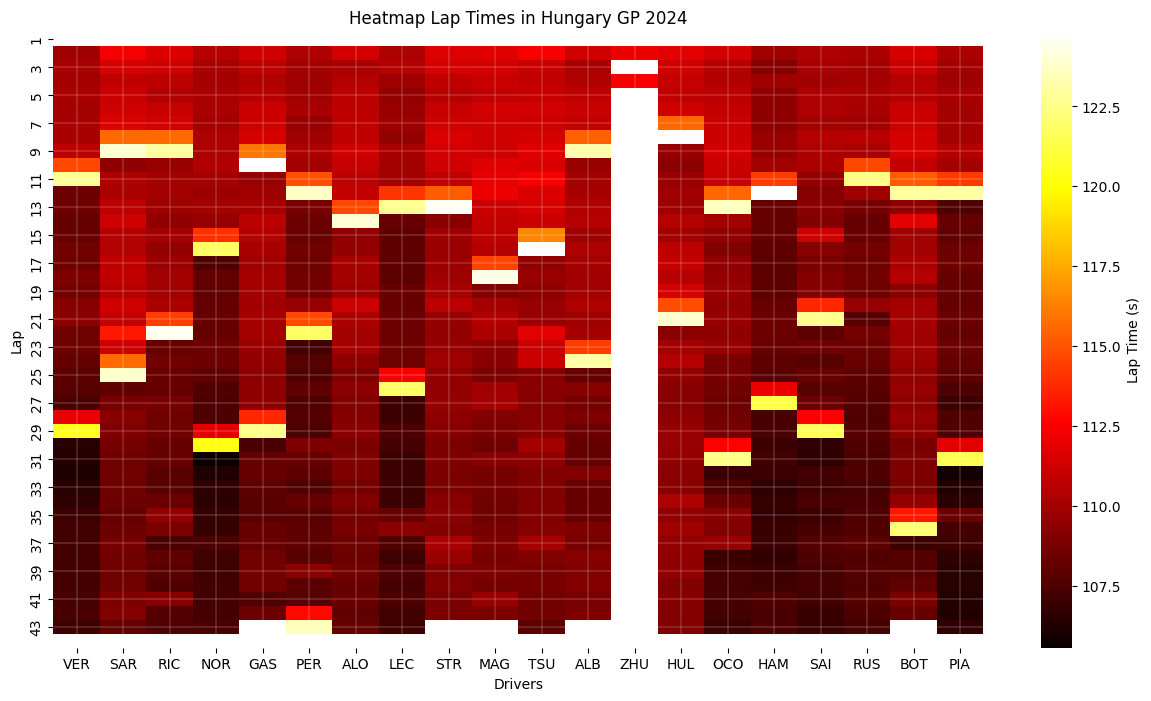

In [19]:
plt.subplots(figsize=(15,8))

sns.heatmap(data=lap_times_df[(lap_times_df<125)&(lap_times_df>105)], cmap='hot', cbar_kws={'label': 'Lap Time (s)'})

plt.title("Heatmap Lap Times in Hungary GP 2024")
plt.xlabel("Drivers")
plt.ylabel("Lap")
plt.grid(visible=True, linewidth=0.2, color="white")
plt.show()

In [20]:
fig = go.Figure(data=go.Heatmap(
        z=lap_times_df[(lap_times_df<125)&(lap_times_df>105)].values,
        x=lap_times_df.columns,
        y=lap_times_df.index,
        colorscale='hot'))
fig.update_layout(
    title='Heatmap of Lap Times')
fig.show()

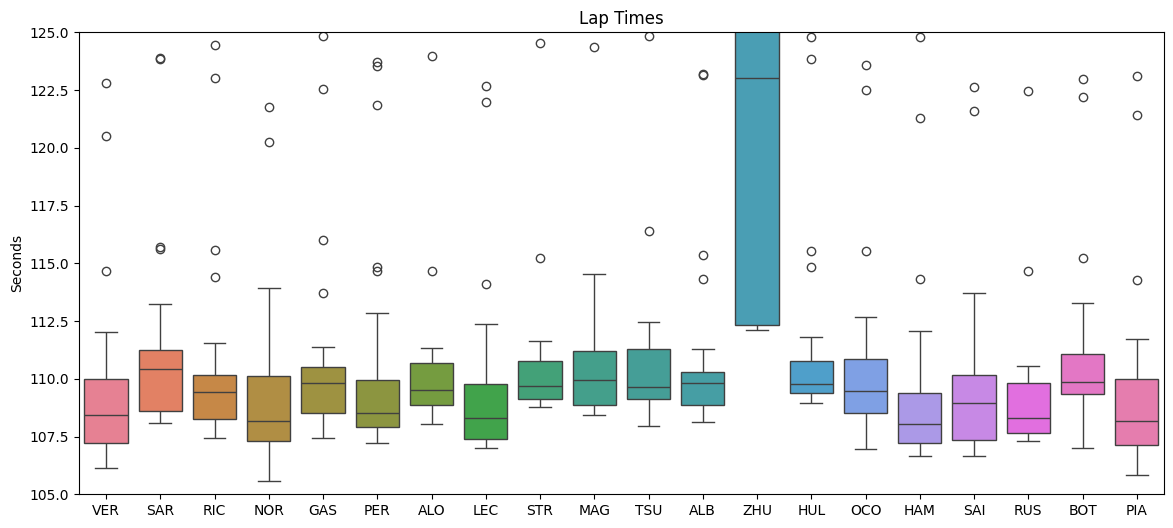

In [21]:
fig, ax = plt.subplots(figsize=(14,6))
sns.boxplot(lap_times_df)
plt.title("Lap Times")
plt.ylim(105,125)
plt.ylabel("Seconds")
plt.show();

In [22]:
min_lap_times = lap_times_df.min().rename("Fastest Lap Times of Drivers")
avg_lap_times = lap_times_df.mean().rename("Average Lap Times of Drivers")

compare = pd.merge(min_lap_times, avg_lap_times, on=min_lap_times.index)
compare["Teams"] = compare["key_0"].map(teams)
compare.rename({"key_0":"Drivers"})
compare.sort_values(by="Fastest Lap Times of Drivers", inplace=True)

In [23]:
compare

,key_0,Fastest Lap Times of Drivers,Average Lap Times of Drivers,Teams
3,NOR,105.563,109.151667,MCL
19,PIA,105.840,108.984214,MCL
0,VER,106.128,109.099619,RBR
16,SAI,106.647,109.409548,FER
15,HAM,106.653,108.996000,MER
14,OCO,106.957,110.100405,ALP
7,LEC,107.013,109.205143,FER
18,BOT,107.019,110.573463,SAU
5,PER,107.223,110.049881,RBR
17,RUS,107.301,108.932476,MER


In [24]:
avg_team_times = compare.groupby("Teams")["Average Lap Times of Drivers"].mean().rename({"Average Lap Times of Drivers":"Average Lap Times of Teams"})

fig = px.line(data_frame=avg_team_times,
              title="Average Lap Times of Teams",
              labels={"value":"Lap Times"})
fig.update_layout(yaxis_range=[105,125])


# AI Integration

In [ ]:
"""
Dependencies
1. DataFrameLoaderx
2. Text Splitterx
3. vector databasex
4. chain
5. llm
6. embeddings
"""

from langchain_community.embeddings import OllamaEmbeddings # Free Embeddings
from langchain_community.document_loaders import DataFrameLoader  # Load Data
from langchain_core.prompts import ChatPromptTemplate # Chat Prompt Template
from langchain.text_splitter import RecursiveCharacterTextSplitter # Text Splitter
from langchain.vectorstores import Chroma  # Vector Database
from langchain_google_genai import GoogleGenerativeAI # Generative AI
# retrieval
from langchain_core.retrievers import 

